In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Dataset Preparation

In [19]:
# Loading the MNIST datset
digits = load_digits()

In [20]:
X = digits.data
Y = digits.target

In [21]:
print(X.shape,Y.shape)

(1797, 64) (1797,)


9


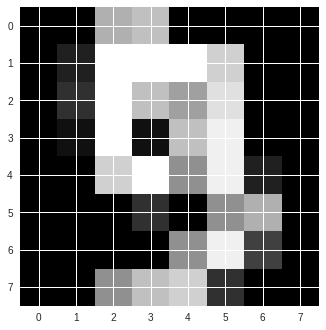

In [25]:
plt.imshow(X[9].reshape((8,8)),cmap="gray")
print(Y[9])
plt.show()

In [28]:
print(X[9])

[ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
 16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
  9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
  4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]


### Training the Models

In [29]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [35]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [33]:
# Training the data
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
print(mnb.score(X,Y))
print(gnb.score(X,Y))

0.9053978853644964
0.8580968280467446


In [37]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8113904407200497

In [38]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8797858472998138

In [39]:
# Multinomial Naive Bayes gives better result because, the features are discrete